In [2]:
%reload_ext autoreload
%autoreload 2

from func import *
import pandas as pd
import pickle
from tensorflow.keras.models import load_model




In [3]:
filename = 'all_data_anonymized.csv'
date_col = 'todate'
start_date = '1980-01-01'
seperator = ';'
fill = 0
lim = 5
df_read = load_and_preprocess_data(filename, date_col, start_date, seperator, fill, lim)


d:\master3\Master-thesis\Files\func.py:21: DtypeWarning: Columns (15,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_read = pd.read_csv(filename, sep=seperator)


In [4]:
windows = [5, 10, 20, 40, 60, 100, 180, 240, 360, 480]
window_m = [10, 30, 60, 100, 180]
assets = df_read.columns
df_feat = add_features(df_read, window_m)

In [5]:
target_days = 9

return_column_shift = 'avgreturn'
volatility_column_shift = 'volatility'
df = add_y_col(df_feat, df_read, date_col, target_days, return_column_shift, volatility_column_shift)

In [6]:
X_train, X_eval, X_test, y_train, y_eval, y_test, X_train_eval, y_train_eval = prepare_training_dataset(df, date_col, shuffle=False, train_split=0.25, eval_split=0.25)

In [7]:
# load all models

NN_model = load_model('NN_model.h5')
ridge_best = pickle.load(open('ridge_model.pickle', 'rb'))
lgb_best = pickle.load(open('lgb_model.pickle', 'rb'))
xgb_best = pickle.load(open('xgb_model.pickle', 'rb'))


In [8]:

# Store predictions in a dictionary
predictions = {
    "Ridge Classifier": ridge_best.predict(X_test),
    "XGBoost Classifier": xgb_best.predict(X_test),
    "LightGBM Classifier": lgb_best.predict(X_test),
}   

# Iterate through the dictionary and evaluate each model
for model_name, y_pred in predictions.items():
    print(model_name + ":")
    evaluate_model_performance(y_test, y_pred)
    print("\n")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Ridge Classifier:
Accuracy: 0.5281781630148452
Confusion Matrix:
[[70783 28420]
 [63464 32076]]
Precision: 0.5302168738428987
Recall: 0.33573372409462005
F1 Score: 0.41113589171729603
MSE: 0.4718218369851548
RMSE: 0.6868928861075465


XGBoost Classifier:
Accuracy: 0.5266325362143954
Confusion Matrix:
[[58120 41083]
 [51102 44438]]
Precision: 0.5196150653055974
Recall: 0.46512455516014234
F1 Score: 0.490862195613633
MSE: 0.4733674637856046
RMSE: 0.6880170519584559


LightGBM Classifier:
Accuracy: 0.5251279891960173
Confusion Matrix:
[[59317 39886]
 [52592 42948]]
Precision: 0.5184827486297897
Recall: 0.4495289930918987
F1 Score: 0.48155000168185946
MSE: 0.47487201080398267
RMSE: 0.6891095782268468




In [32]:
%reload_ext autoreload
%autoreload 2
models = {
    'lgb': lgb_best,
    'xgb': xgb_best,
    'ridge': ridge_best
}

# Dictionary to hold the results
results_best = {}
results_worst = {}

for name, model in models.items():
    results_best[name], results_worst[name] = predict_and_analyze_ext(model, X_test, df, name) 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [33]:
# keep same index from X_test in df as new df

df_2 = df.loc[X_test.index]


In [34]:

# Use the dates in df_2 to filter rows in df_read
df_2_read = df_read.loc[df_2[date_col].unique()]

# fill missing values with 0
df_2_read.fillna(0, inplace=True)

In [63]:
df.head()

,todate,asset,VaR_10,VaR_100,VaR_180,VaR_30,VaR_60,avgreturn_10,avgreturn_100,avgreturn_180,avgreturn_30,avgreturn_60,momentum_10,momentum_100,momentum_180,momentum_30,momentum_60,skew_10,skew_100,skew_180,skew_30,skew_60,volatility_10,volatility_100,volatility_180,volatility_30,volatility_60,MACRO_8,MACRO_0,MACRO_1,MACRO_2,MACRO_3,MACRO_4,MACRO_5,MACRO_6,MACRO_7,Y
120284,1997-07-25,EQS_0,-0.012419,-0.027867,-0.021799,-0.017527,-0.018084,0.002417,0.000965,0.001501,0.001368,0.002340,0.024167,0.092656,0.258166,0.038305,0.133397,-0.000366,-0.430148,-0.393705,-0.227304,-0.456774,0.011586,0.014642,0.013352,0.012851,0.012667,-0.013365,0.008342,0.006122,0.003334,0.020771,-0.005753,0.006034,-0.022739,0.0,1
120285,1997-07-25,EQS_1,-0.017053,-0.020400,-0.020233,-0.019890,-0.018676,-0.000581,0.001318,0.001369,0.000985,0.002530,-0.005813,0.127876,0.236827,0.028556,0.146731,-0.149339,-0.215706,-0.026699,0.470290,0.225803,0.011852,0.014635,0.013776,0.014864,0.013114,-0.013365,0.008342,0.006122,0.003334,0.020771,-0.005753,0.006034,-0.022739,0.0,1
120286,1997-07-25,EQS_10,-0.021068,-0.022818,-0.018827,-0.022964,-0.022541,-0.000989,0.000404,0.000697,-0.001385,0.000894,-0.009886,0.039230,0.120511,-0.040176,0.051878,0.579712,-0.090975,-0.050601,0.006137,0.034475,0.015149,0.013122,0.011960,0.012665,0.012172,-0.013365,0.008342,0.006122,0.003334,0.020771,-0.005753,0.006034,-0.022739,0.0,1
120287,1997-07-25,EQS_2,-0.012701,-0.014182,-0.011899,-0.016148,-0.012140,0.001843,0.001058,0.000796,0.001652,0.002294,0.018427,0.101567,0.136959,0.047898,0.133051,0.059152,-0.064348,-0.019025,0.114231,0.011804,0.011715,0.010250,0.009119,0.011535,0.010179,-0.013365,0.008342,0.006122,0.003334,0.020771,-0.005753,0.006034,-0.022739,0.0,1
120288,1997-07-25,EQS_3,-0.015363,-0.015846,-0.012966,-0.015688,-0.012114,0.001626,0.001758,0.001219,0.001664,0.002744,0.016257,0.170478,0.210841,0.048260,0.159161,-0.102896,-0.254505,-0.129573,-0.550835,-0.354502,0.011693,0.010184,0.009325,0.010237,0.009328,-0.013365,0.008342,0.006122,0.003334,0.020771,-0.005753,0.006034,-0.022739,0.0,1


In [43]:
import pandas as pd

df_2_neutral = df_2_read.copy()

for col in df_2_neutral.columns:
    df_2_neutral[col] = 0  


model_dfs = {
    'lgb': df_2_neutral.copy(),
    'xgb': df_2_neutral.copy(),
    'ridge': df_2_neutral.copy()
}



In [64]:
import pandas as pd

start_date = pd.to_datetime('2011-01-01')  # Starting from the first available date
end_date = df_2_read.index[-1]  # End at the last date in your dataset
# Gather all best and worst assets for each date for each model
portfolios_best = { 'lgb': {}, 'xgb': {}, 'ridge': {} }
portfolios_worst = { 'lgb': {}, 'xgb': {}, 'ridge': {} }
current_date = start_date
while current_date <= end_date:
    # Predict and select assets using data up to current_date
    X_period = X_test.loc[df_2['todate'] <= current_date]
    df_period = df.loc[df['todate'] <= current_date]

    for name, model in models.items():
        best_assets, worst_assets = predict_and_analyze_ext(model, X_period, df_period, name)
        portfolios_best[name][current_date] = best_assets['asset'].tolist()
        portfolios_worst[name][current_date] = worst_assets['asset'].tolist()

    # Apply the current asset decisions for the next 10 days
    next_date = min(current_date + pd.DateOffset(days=9), end_date)
    for date in pd.date_range(current_date, next_date):
        update_df_with_asset_performance(model_dfs[name], portfolios_best[name][current_date], 1)
        update_df_with_asset_performance(model_dfs[name], portfolios_worst[name][current_date], -1)

    # Move to the next evaluation period
    current_date = next_date + pd.DateOffset(days=1)

def update_df_with_asset_performance(df, start_date, assets, value):
    """ Update df by marking assets with a specified value from start_date for 10 days."""
    date_range = pd.date_range(start=start_date, periods=10)
    for date in date_range:
        for asset in assets:
            if asset in df.columns:
                df.at[date, asset] = value


ValueError: Input data must be 2 dimensional and non empty.

In [36]:
def update_df_with_asset_performance(df, portfolios, value):
    """ Update df by marking assets in portfolios with a specified value. """
    for date, assets in portfolios.items():
        for asset in assets:
            if asset in df.columns: 
                df.at[pd.to_datetime(date), asset] = value


# Gather all best and worst assets for each date for each model
portfolios_best = { 'lgb': {}, 'xgb': {}, 'ridge': {} }
portfolios_worst = { 'lgb': {}, 'xgb': {}, 'ridge': {} }

for name, model in models.items():
    best_assets, worst_assets = predict_and_analyze_ext(model, X_test, df, name) 

    # Accumulate best and worst assets for each date
    for date in best_assets['todate'].unique():
        portfolios_best[name].setdefault(date, []).extend(best_assets[best_assets['todate'] == date]['asset'].tolist())
        portfolios_worst[name].setdefault(date, []).extend(worst_assets[worst_assets['todate'] == date]['asset'].tolist())

    update_df_with_asset_performance(model_dfs[name], portfolios_best[name], 1)
    update_df_with_asset_performance(model_dfs[name], portfolios_worst[name], -1)




[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [50]:
start_date = pd.to_datetime(df_2_read.index.min())
print(start_date)  # Should show 2011-01-05 00:00:00 if this is the first date in your index

# Accessing data on this start date
data_on_start_date = df_2_read.loc[start_date]
print(data_on_start_date)


2011-01-05 00:00:00
EQ_0      -0.002700
EQ_1       0.005128
EQ_2      -0.005241
EQ_3       0.003545
EQ_4      -0.004538
EQ_5       0.010744
EQ_6       0.001964
EQ_7      -0.015093
EQ_8       0.011424
EQ_9       0.003574
EQ_10      0.000403
EQ_11      0.002804
EQ_12     -0.003885
EQ_13     -0.004664
EQ_14     -0.004252
EQ_15      0.005685
EQ_16     -0.009953
EQS_0      0.011980
EQS_1      0.001843
EQS_2      0.000423
EQS_3      0.005021
EQS_4      0.002091
EQS_5      0.000741
EQS_6     -0.006181
EQS_7      0.006700
EQS_8      0.007864
EQS_9      0.006675
EQS_10     0.006047
FI_0      -0.008335
FI_1      -0.001650
FI_2      -0.005773
FI_3      -0.006632
FI_4      -0.000697
FI_5       0.001141
FI_6      -0.004097
FI_7      -0.003542
FI_8      -0.004929
FI_9      -0.002119
FI_10     -0.009083
FI_11     -0.015461
FI_12     -0.010977
FI_13     -0.017920
FI_14      0.001042
FXD_0     -0.005175
FXD_1     -0.005642
FXD_2      0.003504
FXD_3      0.010472
FXD_4     -0.011720
FXD_5     -0.016188


In [37]:
a = model_dfs['ridge']


b = df_2_read

ab = a*b
#np.dot(a,b).cumsum()

In [42]:
a.head()

,EQ_0,EQ_1,EQ_2,EQ_3,EQ_4,EQ_5,EQ_6,EQ_7,EQ_8,EQ_9,EQ_10,EQ_11,EQ_12,EQ_13,EQ_14,EQ_15,EQ_16,EQS_0,EQS_1,EQS_2,EQS_3,EQS_4,EQS_5,EQS_6,EQS_7,EQS_8,EQS_9,EQS_10,FI_0,FI_1,FI_2,FI_3,FI_4,FI_5,FI_6,FI_7,FI_8,FI_9,FI_10,FI_11,FI_12,FI_13,FI_14,FXD_0,FXD_1,FXD_2,FXD_3,FXD_4,FXD_5,FXD_6,FXD_7,FXD_8,FXD_9,FXE_0,FXE_1,FXE_2,FXE_3,FXE_4,MACRO_8,MACRO_0,MACRO_1,MACRO_2,MACRO_3,MACRO_4,MACRO_5,MACRO_6,MACRO_7
todate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-01-06,0,0,0,0,-1,1,1,0,-1,0,0,0,0,0,0,-1,0,0,0,1,0,0,0,0,-1,0,1,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,1,0,0,0,0,0,0,0,0,0,0
2011-01-07,0,0,0,-1,-1,1,1,0,-1,0,0,0,0,0,0,-1,0,0,0,1,0,0,0,0,-1,0,1,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2011-01-10,0,0,0,-1,-1,1,0,1,-1,0,0,0,0,0,0,-1,0,0,0,1,0,0,0,0,0,0,1,0,-1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2011-01-11,0,0,0,-1,0,1,0,0,0,0,0,0,0,0,0,-1,1,0,0,0,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,-1,0,0,0,0,0,0,0,0,-1,0,1,-1,0,0,0,0,0,0,0,0,0


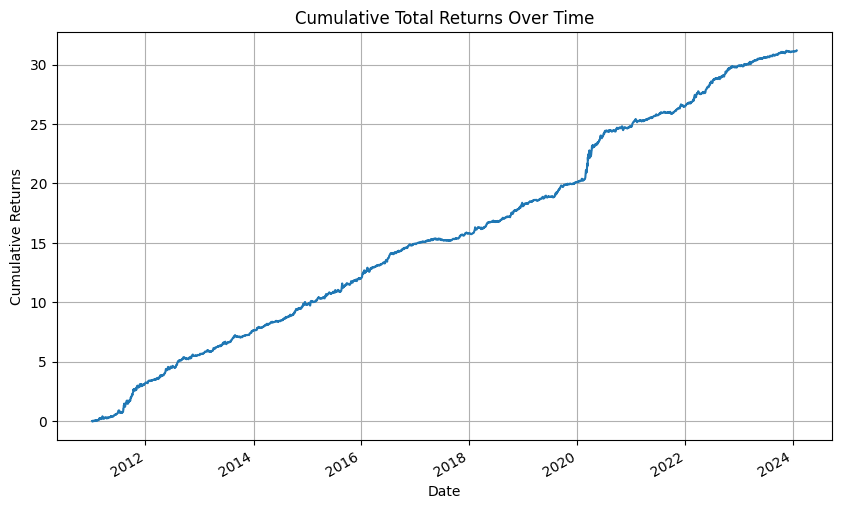

In [39]:
# Sum the returns across all assets for each day to get the daily total return
daily_total_returns = ab.sum(axis=1)
cumulative_total_returns = daily_total_returns.cumsum()
import matplotlib.pyplot as plt

# Plotting the cumulative total returns
cumulative_total_returns.plot(figsize=(10, 6), title='Cumulative Total Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()



In [40]:
cumulative_total_returns[-1]

C:\Users\Oscar Azrak\AppData\Local\Temp\ipykernel_11232\923266865.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_total_returns[-1]


31.179732755524938